In [7]:
# Importamos los modulos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
datos = pd.read_csv(r'C:\Users\javie\Downloads\GOOGL.csv')
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,2901.100098,2917.020020,2874.260010,2899.830078,2899.830078,1432300
1,2022-01-04,2907.919922,2929.699951,2874.330078,2887.989990,2887.989990,1420000
2,2022-01-05,2888.399902,2889.989990,2753.760010,2755.500000,2755.500000,2730900
3,2022-01-06,2739.969971,2798.800049,2731.169922,2754.949951,2754.949951,1867400
4,2022-01-07,2762.909912,2768.969971,2715.330078,2740.340088,2740.340088,1488000


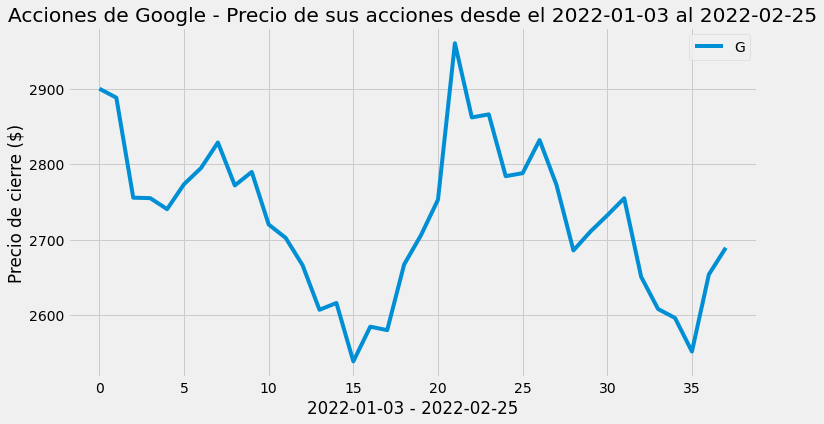

In [14]:
# Graficar los datos
plt.figure(figsize = (11, 6))
plt.plot(datos['Close'], label = 'Google Stock')
plt.title('Acciones de Google - Precio de sus acciones desde el 2022-01-03 al 2022-02-25')
plt.xlabel('2022-01-03 - 2022-02-25')
plt.ylabel('Precio de cierre ($)')
plt.legend('Google')
plt.show()

In [15]:
MVS30 = pd.DataFrame()
MVS30['Close'] = datos['Close'].rolling(window = 30).mean()
MVS30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [17]:
MVS30[MVS30.index == 29]

,Close
29,2746.591007


In [18]:
MVS100 = pd.DataFrame()
MVS100['Close'] = datos['Close'].rolling(window = 100).mean()
MVS100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [19]:
MVS100[MVS100.index == 99]

,Close


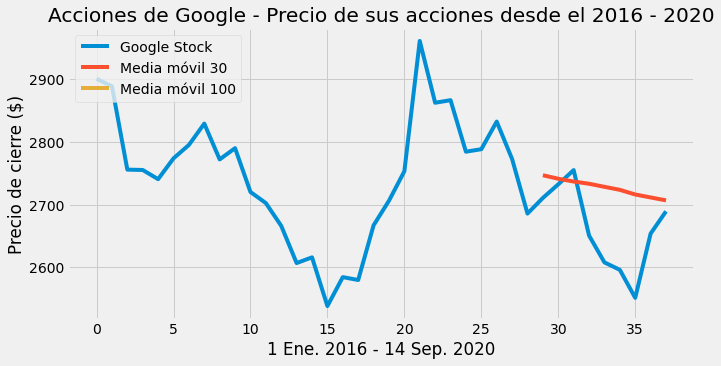

In [20]:
# Graficar los datos
plt.figure(figsize = (10, 5))
plt.plot(datos['Close'], label = 'Google Stock')
plt.plot(MVS30['Close'], label = 'Media móvil 30')
plt.plot(MVS100['Close'], label = 'Media móvil 100')
plt.title('Acciones de Google - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [21]:
data = pd.DataFrame()
data['Google'] = datos['Close']
data['MVS30'] = MVS30['Close']
data['MVS100'] = MVS100['Close']
data

,Google,MVS30,MVS100
0,2899.830078,NaN,NaN
1,2887.989990,NaN,NaN
2,2755.500000,NaN,NaN
3,2754.949951,NaN,NaN
4,2740.340088,NaN,NaN
5,2773.389893,NaN,NaN
6,2794.719971,NaN,NaN
7,2828.610107,NaN,NaN
8,2771.739990,NaN,NaN
9,2789.610107,NaN,NaN


In [22]:
def senal(data):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data['MVS30'][dia] > data['MVS100'][dia]:
            if condicion != 1:
                compra.append(data['Google'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data['MVS30'][dia] < data['MVS100'][dia]:
            if condicion != -1:
                venta.append(data['Google'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)    

In [23]:
senales = senal(data)
data['Compra'] = senales[0]
data['Venta'] = senales[1]
data

,Google,MVS30,MVS100,Compra,Venta
0,2899.830078,NaN,NaN,NaN,NaN
1,2887.989990,NaN,NaN,NaN,NaN
2,2755.500000,NaN,NaN,NaN,NaN
3,2754.949951,NaN,NaN,NaN,NaN
4,2740.340088,NaN,NaN,NaN,NaN
5,2773.389893,NaN,NaN,NaN,NaN
6,2794.719971,NaN,NaN,NaN,NaN
7,2828.610107,NaN,NaN,NaN,NaN
8,2771.739990,NaN,NaN,NaN,NaN
9,2789.610107,NaN,NaN,NaN,NaN


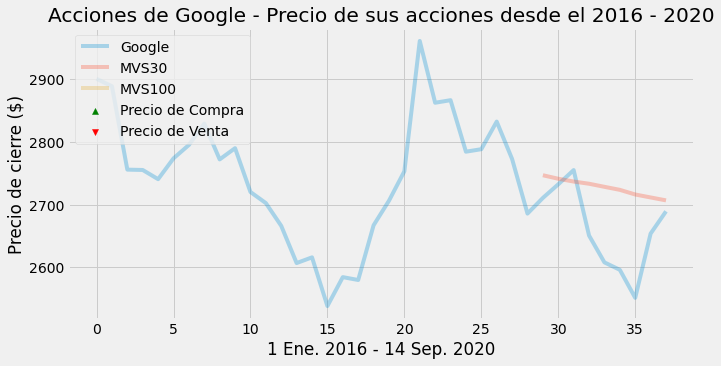

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(data['Google'], label = 'Google', alpha = 0.3)
plt.plot(data['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data.index, data['Compra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data.index, data['Venta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Acciones de Google - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()